<a href="https://colab.research.google.com/github/LukaszSzarecki/music-source-separation/blob/develop/inzynierka_dzwiek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nussl
!pip install scaper
import nussl
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving guitar_emoll.mp3 to guitar_emoll.mp3


In [ ]:
input_file_path = nussl.efz_utils.download_audio_file('schoolboy_fascination_excerpt.wav')
# input_file_path = './guitar_emoll.mp3'


my_signal = nussl.AudioSignal(input_file_path)

Matching file found at /root/.nussl/audio/schoolboy_fascination_excerpt.wav, skipping download.


### Cechy sygnułów dźwiękowych

In [ ]:
print(f"Czas trwania sygnału: {my_signal.signal_duration} [s]")
print(f"Liczba próbek w sygnale: {my_signal.signal_length} ")
print(f"Liczba kanałów: {my_signal.num_channels} ")
print(f"RMS energia: {my_signal.rms().mean()}")

Czas trwania sygnału: 15.0 [s]
Liczba próbek w sygnale: 661500 
Liczba kanałów: 2 
RMS energia: 0.11359135806560516


In [ ]:
my_signal.embed_audio()
print(my_signal)

AudioSignal (unlabeled): 15.000 sec @ /root/.nussl/audio/schoolboy_fascination_excerpt.wav, 44100 Hz, 2 ch.


In [ ]:
my_signal.stft(window_length = 1024, hop_length = 512)
my_signal.stft_data.shape

(513, 1293, 2)

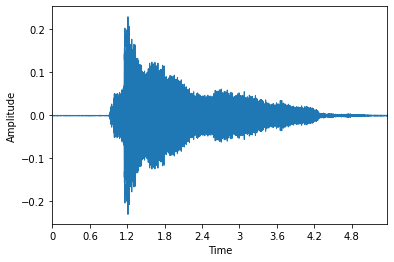

In [ ]:
# Fala dźwiękowa
nussl.utils.visualize_waveform(
    my_signal)

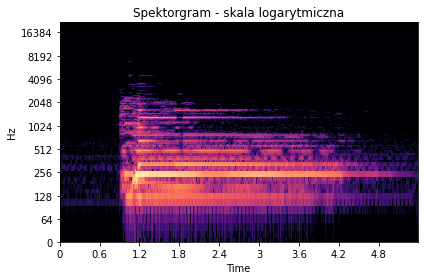

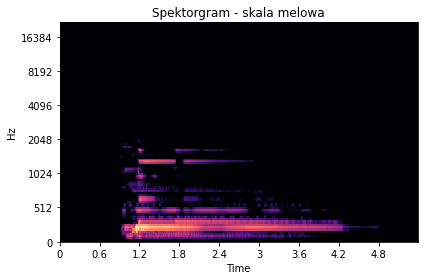

In [ ]:
# Spektorgram Mel-a

plt.figure()

fig, axs = plt.subplots(2, 2)


nussl.utils.visualize_spectrogram(my_signal,  y_axis='log')
plt.title("Spektorgram - skala logarytmiczna")
plt.tight_layout()
plt.show()

plt.figure()
nussl.utils.visualize_spectrogram(my_signal,  y_axis='mel')
plt.title("Spektorgram - skala melowa")
plt.tight_layout()
plt.show()

# Spektorgram logarytmicznym


### Operacje na sygnałach dźwiękowych

Zaprezentowane poniższej operacje to:
1.   Prosta analiza czasowo-częstotliwościowa
2.   Filtr dolnoprzepustowy
3.   Filtr górnoprzepustowy


In [ ]:
# Analiza czasowo-częstotliwościowa

# Inicjowanie STFT
 
window_len=1024 #ilość czasu (w próbkach) na wykonanie FFT
hop_len=512 #ilość czasu (w próbkach) do przeskoczenia do przodu dla nowego FFT
window_t="sqrt_hann" #rodzaj skalowania do zastosowania w oknie

my_signal.stft(window_length=window_len, hop_length=hop_len, window_type=window_t)
# my_signal.stft()

print(f"Wymiary spektogramu STFT {my_signal.stft_data.shape}") #przedzialy czest, liczba skokow, liczba kanalow
print(f"Liczba przedziałów częstotliwośći {len(my_signal.freq_vector)}")
# przedziały częstotliwości są określone przez długość okna
# im dłuższe okno, tym wyższa rozdzielczość częstotliwości

my_signal.stft_data[0, ...]

Wymiary spektogramu STFT (513, 1293, 2)
Liczba przedziałów częstotliwośći 513


array([[-0.00467105+0.j, -0.00745644+0.j],
       [-0.00371852+0.j, -0.00213745+0.j],
       [ 0.01345487+0.j,  0.01522212+0.j],
       ...,
       [-0.00375168+0.j, -0.00178145+0.j],
       [-0.00444027+0.j, -0.00516784+0.j],
       [-0.01918421+0.j, -0.01736917+0.j]], dtype=complex64)

In [ ]:
my_signal.stft_params


STFTParams(window_length=2048, hop_length=512, window_type='sqrt_hann')

In [ ]:
# Filtr dolnoprzepustowy
import numpy as np

# my_signal.to_mono(overwrite=True) # stereo -> mono

lp_stft = my_signal.stft_data.copy()
lp_cutoff = 1200  # Hz
frequency_vector = my_signal.freq_vector  # wektor częstotliwości 
idx = (np.abs(frequency_vector - lp_cutoff)).argmin()  
lp_stft[idx:,...] = 0.0j  # każda częstotliwość powyżej lp_cutoff zostaje ucięta

my_signal_lp = my_signal.make_copy_with_stft_data(lp_stft)

my_signal_lp.istft(window_length=window_len, hop_length=hop_len, window_type=window_t)


array([[ 0.00700791,  0.00814669,  0.0091745 , ..., -0.15323797,
        -0.14159562, -0.12941688],
       [-0.04788812, -0.05237553, -0.0570327 , ..., -0.13908371,
        -0.13112459, -0.122332  ]], dtype=float32)

In [ ]:
my_signal_lp.embed_audio()
print(my_signal_lp)

AudioSignal (unlabeled): 15.000 sec @ /root/.nussl/audio/schoolboy_fascination_excerpt.wav, 44100 Hz, 2 ch.


In [ ]:
# Filtr górnoprzepustowy

hp_stft = my_signal.stft_data.copy()
hp_cutoff = 800  # Hz
frequency_vector = my_signal.freq_vector
idx = (np.abs(frequency_vector - hp_cutoff)).argmin() 
hp_stft[:idx,...] = 0.0j  # każda częstotliwość poniżej hp_cutoff zostaje ucięta

my_signal_hp = my_signal.make_copy_with_stft_data(hp_stft)

my_signal_hp.istft(window_length=window_len, hop_length=hop_len, window_type=window_t)


array([[-0.00339727, -0.05045344, -0.0557237 , ..., -0.09636747,
        -0.08771877, -0.06930742],
       [-0.11829163, -0.13743879, -0.13861203, ..., -0.10526335,
        -0.08230228, -0.0356845 ]], dtype=float32)

In [ ]:
my_signal_hp.embed_audio()
print(my_signal_hp)

AudioSignal (unlabeled): 15.000 sec @ /root/.nussl/audio/schoolboy_fascination_excerpt.wav, 44100 Hz, 2 ch.
